In [1]:
#=====================
# STEP 1: COLLECT DATA
#=====================
q2_2019 <- readxl::read_excel("../input/divvy-trips-dataset/Divvy_Trips_2019_Q2.xlsx")
q3_2019 <- readxl::read_excel("../input/divvy-trips-dataset/Divvy_Trips_2019_Q3.xlsx")
q4_2019 <- readxl::read_excel("../input/divvy-trips-dataset/Divvy_Trips_2019_Q4.xlsx")
q1_2020 <- readxl::read_excel("../input/divvy-trips-dataset/Divvy_Trips_2020_Q1.xlsx")


In [ ]:
#Install and load plyr package and afterwards the dplyr package

install.packages("plyr")
library("plyr")
install.packages("dplyr")
library("dplyr")
# # # # # # # # # # # # # # # # # # # # # # # 
# Install required packages
  install.packages ("tidyverse") 
  install.packages ("lubridate")
  install.packages ("ggplot")
# # # # # # # # # # # # # # # # # # # # # # #  

library("tidyverse")  
library("lubridate")
library("ggplot2") 

In [3]:
#====================================================
# STEP 2: WRANGLE DATA AND COMBINE INTO A SINGLE FILE
#====================================================
# Compare column names for each of the files
# While the names don't have to be in the same order, they DO need to match perfectly before we can use a command to join them into one file
colnames(q3_2019)
colnames(q4_2019)
colnames(q2_2019)
colnames(q1_2020)

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "01 - Rental Details Rental ID"                   
 [2] "01 - Rental Details Local Start Time"            
 [3] "01 - Rental Details Local End Time"              
 [4] "01 - Rental Details Bike ID"                     
 [5] "01 - Rental Details Duration In Seconds Uncapped"
 [6] "03 - Rental Start Station ID"                    
 [7] "03 - Rental Start Station Name"                  
 [8] "02 - Rental End Station ID"                      
 [9] "02 - Rental End Station Name"                    
[10] "User Type"                                       
[11] "Member Gender"                                   
[12] "05 - Member Details Member Birthday Year"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [4]:
# I rename columns to make them consistent with q1_2020 (as this will be the supposed going-forward table design for Divvy)
q4_2019 <- rename(q4_2019
                  ,ride_id = trip_id
                  ,rideable_type = bikeid 
                  ,started_at = start_time  
                  ,ended_at = end_time  
                  ,start_station_name = from_station_name 
                  ,start_station_id = from_station_id 
                  ,end_station_name = to_station_name 
                  ,end_station_id = to_station_id 
                  ,member_casual = usertype)

q3_2019 <- rename(q3_2019
                  ,ride_id = trip_id
                  ,rideable_type = bikeid 
                  ,started_at = start_time  
                  ,ended_at = end_time  
                  ,start_station_name = from_station_name 
                  ,start_station_id = from_station_id 
                  ,end_station_name = to_station_name 
                  ,end_station_id = to_station_id 
                  ,member_casual = usertype)

q2_2019 <- rename(q2_2019
                  ,ride_id = "01 - Rental Details Rental ID"
                  ,rideable_type = "01 - Rental Details Bike ID" 
                  ,started_at = "01 - Rental Details Local Start Time"  
                  ,ended_at = "01 - Rental Details Local End Time"  
                  ,start_station_name = "03 - Rental Start Station Name" 
                  ,start_station_id = "03 - Rental Start Station ID"
                  ,end_station_name = "02 - Rental End Station Name" 
                  ,end_station_id = "02 - Rental End Station ID"
                  ,member_casual = "User Type")


In [ ]:
# I inspect the dataframes and look for incongruencies
str(q1_2020)
str(q4_2019)
str(q3_2019)
str(q2_2019)

In [6]:
# I convert ride_id and rideable_type to character so that they can stack correctly
q4_2019 <-  mutate(q4_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type)) 
q3_2019 <-  mutate(q3_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type)) 
q2_2019 <-  mutate(q2_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type))

# Stack individual quarter's data frames into one big data frame
all_trips <- bind_rows(q2_2019, q3_2019, q4_2019, q1_2020)

# Remove lat, long, birthyear, and gender fields as those columns were dropped beginning in 2020
all_trips <- all_trips %>%  
  select(-c(start_lat, start_lng, end_lat, end_lng, birthyear, gender, "01 - Rental Details Duration In Seconds Uncapped", "05 - Member Details Member Birthday Year", "Member Gender", "tripduration"))


In [7]:
#======================================================
# STEP 3: CLEAN UP AND ADD DATA TO PREPARE FOR ANALYSIS
#======================================================
# Inspect the new table that has been created
colnames(all_trips)  
nrow(all_trips)  
dim(all_trips)  
head(all_trips)  
str(all_trips)  
summary(all_trips)

[1] "ride_id"            "started_at"         "ended_at"          
[4] "rideable_type"      "start_station_id"   "start_station_name"
[7] "end_station_id"     "end_station_name"   "member_casual"

[1] 3228091

[1] 3228091       9

ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual
<chr>,<dttm>,<dttm>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber
22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber
22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber
22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber
22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber
22178534,2019-04-01 00:19:39,2019-04-01 00:23:56,3123,420,Ellis Ave & 55th St,426,Ellis Ave & 60th St,Subscriber


tibble [3,228,091 × 9] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:3228091] "22178529" "22178530" "22178531" "22178532" ...
 $ started_at        : POSIXct[1:3228091], format: "2019-04-01 00:02:22" "2019-04-01 00:03:02" ...
 $ ended_at          : POSIXct[1:3228091], format: "2019-04-01 00:09:48" "2019-04-01 00:20:30" ...
 $ rideable_type     : chr [1:3228091] "6251" "6226" "5649" "4151" ...
 $ start_station_id  : num [1:3228091] 81 317 283 26 202 420 503 260 211 211 ...
 $ start_station_name: chr [1:3228091] "Daley Center Plaza" "Wood St & Taylor St" "LaSalle St & Jackson Blvd" "McClurg Ct & Illinois St" ...
 $ end_station_id    : num [1:3228091] 56 59 174 133 129 426 500 499 211 211 ...
 $ end_station_name  : chr [1:3228091] "Desplaines St & Kinzie St" "Wabash Ave & Roosevelt Rd" "Canal St & Madison St" "Kingsbury St & Kinzie St" ...
 $ member_casual     : chr [1:3228091] "Subscriber" "Subscriber" "Subscriber" "Subscriber" ...


   ride_id            started_at                     ended_at                  
 Length:3228091     Min.   :2019-04-01 00:02:22   Min.   :2019-04-01 00:09:48  
 Class :character   1st Qu.:2019-06-11 20:25:09   1st Qu.:2019-06-11 20:49:44  
 Mode  :character   Median :2019-08-01 13:50:26   Median :2019-08-01 14:18:30  
                    Mean   :2019-08-23 20:42:03   Mean   :2019-08-23 21:06:37  
                    3rd Qu.:2019-10-25 14:59:11   3rd Qu.:2019-10-25 15:20:19  
                    Max.   :2020-03-31 23:51:34   Max.   :2020-05-19 20:10:34  
                                                                               
 rideable_type      start_station_id start_station_name end_station_id 
 Length:3228091     Min.   :  1.0    Length:3228091     Min.   :  1.0  
 Class :character   1st Qu.: 77.0    Class :character   1st Qu.: 77.0  
 Mode  :character   Median :174.0    Mode  :character   Median :174.0  
                    Mean   :202.8                       Mean   :203.5  


There are a few problems I will need to fix:
(1) In the "member_casual" column, there are two names for members ("member" and "Subscriber") and two names for casual riders ("Customer" and "casual"). I will consolidate that from four to two labels.
(2) The data can only be aggregated at the ride-level, which is too granular. I will add additional columns of data -- such as day, month, year -- that provide additional opportunities to aggregate the data.
(3) I will add a calculated field for length of ride since the 2020Q1 data did not have the "tripduration" column. I will add "ride_length" to the entire dataframe for consistency.
(4) There are some rides where tripduration shows up as negative, I will delete these rides.

In [ ]:
all_trips$member_casual 

# Reassign to the desired values (I will go with the current 2020 labels) - replace "Subscriber" with "member" and "Customer" with "casual"
all_trips <-  all_trips %>% 
  mutate(member_casual = recode(member_casual
                                ,"Subscriber" = "member"
                                ,"Customer" = "casual"))

# Check to make sure the proper number of observations were reassigned
table(all_trips$member_casual)

# Add columns that list the date, month, day, and year of each ride. 
all_trips$date <- as.Date(all_trips$started_at) 
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")

# Add a "ride_length" calculation to all_trips (in seconds)
all_trips$ride_length <- difftime(all_trips$ended_at,all_trips$started_at)

# Inspect the structure of the columns
str(all_trips)

# Convert "ride_length" from Factor to numeric so we can run calculations on the data
is.factor(all_trips$ride_length)
all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))
is.numeric(all_trips$ride_length)

# Remove "bad" data
# The dataframe includes a few hundred negative ride_length. I will create a new version of the dataframe (v2) since I will be removing those data
all_trips_v2 <- all_trips[!(all_trips$start_station_name == "HQ QR" | all_trips$ride_length<0),]

[1] 1475.628

[1] 702

[1] 9387024

[1] 1

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1     406     702    1476    1271 9387024 

all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,3668.4961
member,843.0674


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,1556
member,584


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,9387024
member,9056634


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,2
member,1


all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<chr>,<dbl>
casual,Friday,3967.5253
member,Friday,819.5637
casual,Monday,3472.6890
member,Monday,832.8299
casual,Saturday,3378.9383
member,Saturday,962.6956
casual,Sunday,3642.4692
member,Sunday,918.0980
casual,Thursday,3830.7830


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sun,150386,3642.4692
casual,Mon,79251,3472.6890
casual,Tue,74115,3722.9366
casual,Wed,75738,3923.3790
casual,Thu,82189,3830.7830
casual,Fri,98699,3967.5253
casual,Sat,161485,3378.9383
member,Sun,229255,918.0980
member,Mon,401577,832.8299


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


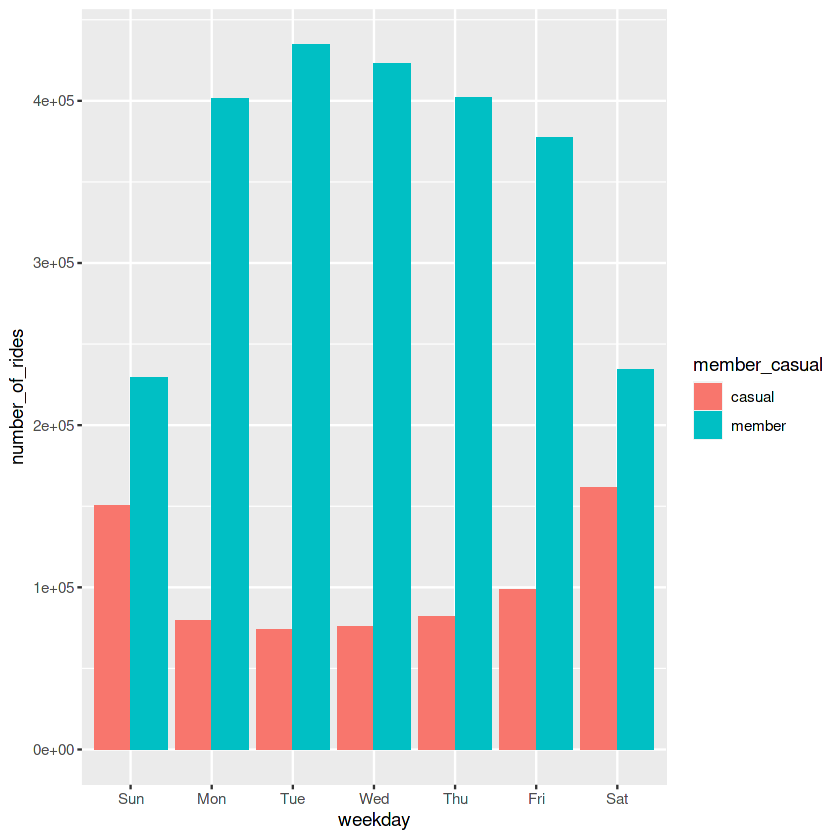

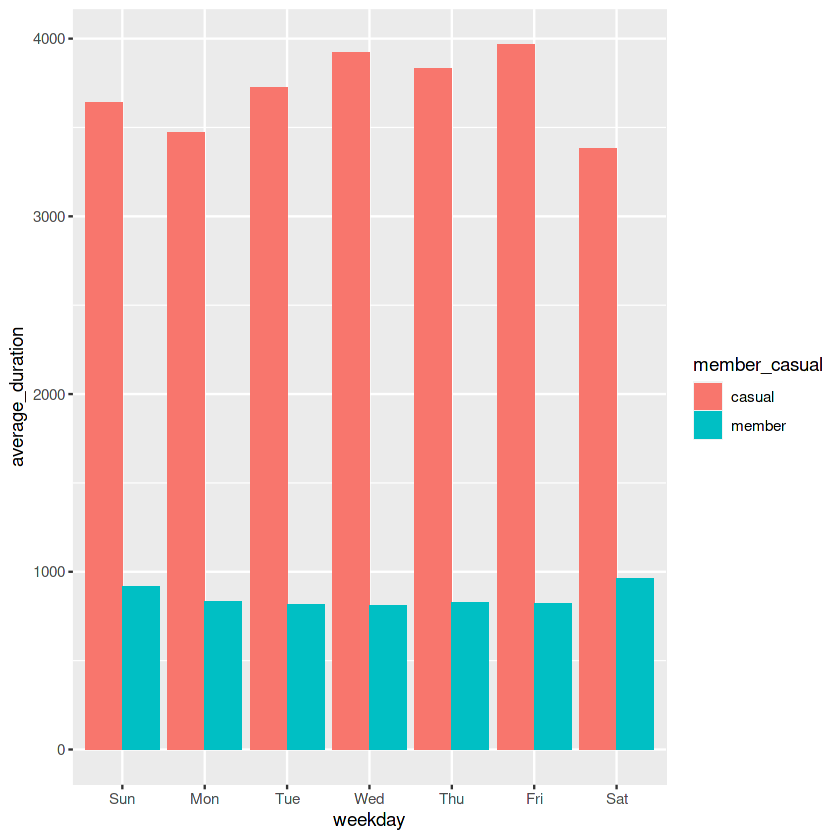

In [9]:
#=====================================
# STEP 4: CONDUCT DESCRIPTIVE ANALYSIS
#=====================================
# Descriptive analysis on ride_length (all figures in seconds)
mean(all_trips_v2$ride_length) 
median(all_trips_v2$ride_length) 
max(all_trips_v2$ride_length) 
min(all_trips_v2$ride_length) 

# I condense the four lines above to one line using summary() on the specific attribute
summary(all_trips_v2$ride_length)

# Now, I compare members and casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = mean)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = median)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = max)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = min)

# And then, I look at the average ride time by each day for members vs. casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

# I analyze ridership data by type and weekday
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>%  #creates weekday field using wday()
  group_by(member_casual, weekday) %>%  #groups by usertype and weekday
  summarise(number_of_rides = n()							#calculates the number of rides and average duration 
            ,average_duration = mean(ride_length)) %>% 		# calculates the average duration
  arrange(member_casual, weekday)	

# Let's visualize the number of rides by rider type
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")

# Let's create a visualization for average duration
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")


In [10]:
#=================================================
# STEP 5: EXPORT SUMMARY FILE FOR FURTHER ANALYSIS
#=================================================
# Create a csv file that we will visualize in Tableau 
counts <- aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)
write.csv(counts, file = "C:\\Users\\cksac\\OneDrive\\Desktop\\Divvy_Exercise\\Cyclistic_Summary_Files.csv", row.names = FALSE)